### IMPORT LIBRARY

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### LOAD DATASET

In [95]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### EXPLORATORY DATA ANALYSIS

In [96]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [97]:
data.duplicated().sum()

0

In [98]:
data.shape

(768, 9)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Di kolom Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, dan BMI terdapat nilai minimum yaitu 0, dalam pregnancies mungkin masih bisa diterima kalau ada nilai 0 karena jenis kelamin laki-laki tidak mengalami kehamilan maka bisa mengisi nilai 0, tapi dikolom Glucose, BloodPressure, SkinThickness, Insulin, dan BMI nilai 0 bisa diasumsikan kalau user tidak menginput nilai. Maka kita mengisi variabel tersebut ( kecuali Pregnancies ) dengan nilai rata-rata agar ketika pembuatan model dapat maksimal akurasinya.

In [101]:
col=['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

for i in col:
    data[i].replace(0, data[i].mean(), inplace=True)
    
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [102]:
# Menghitum jumlah nilai dikolom Outcome
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

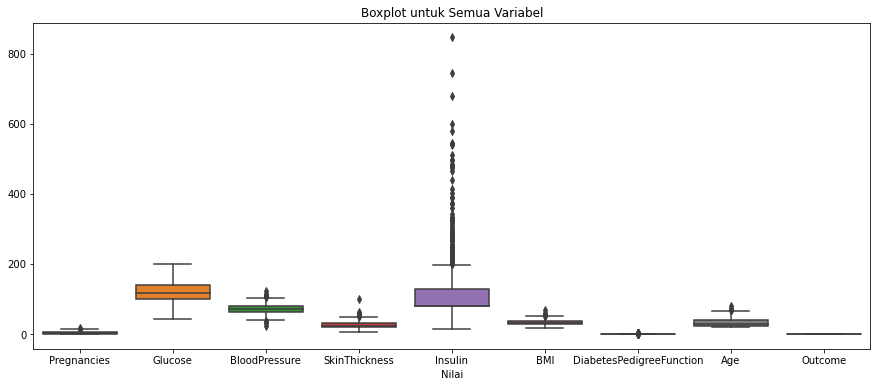

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, orient='v')
plt.title('Boxplot untuk Semua Variabel')
plt.xlabel('Nilai')
plt.show()

In [104]:
def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Menghitung jumlah outlier
    outliers = (column_data < lower_bound) | (column_data > upper_bound)
    
    return np.sum(outliers)

# Menghitung jumlah outlier untuk setiap variabel
data_outliers = data.apply(count_outliers)

print("Jumlah outlier untuk setiap variabel:")
print(data_outliers)

Jumlah outlier untuk setiap variabel:
Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               12
Insulin                     89
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


### PREPROCESSING

In [105]:
# Fungsi untuk menangani outlier dengan truncation
def handle_outliers_truncation(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Mengganti nilai outlier dengan batas atas dan bawah
    column_data[column_data < lower_bound] = lower_bound
    column_data[column_data > upper_bound] = upper_bound
    
    return column_data

# Menangani outlier dengan truncation
data_truncated = handle_outliers_truncation(data)

print("Data setelah penanganan outlier dengan truncation:")
data_truncated

Data setelah penanganan outlier dengan truncation:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [106]:
data_truncated.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

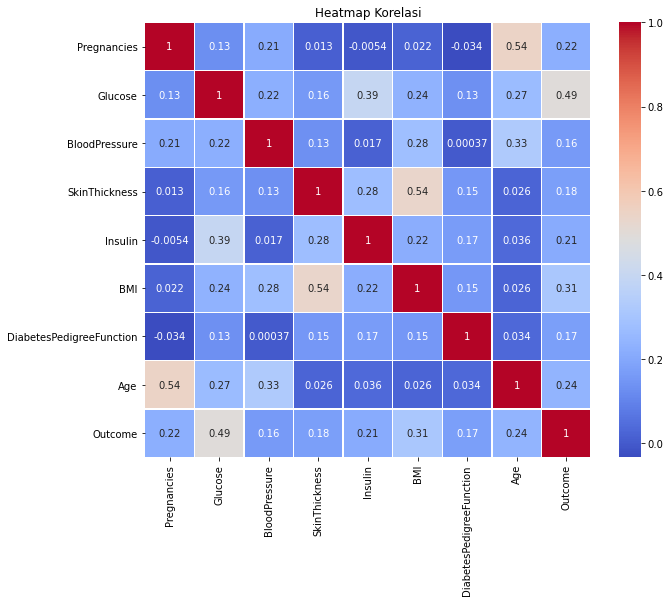

In [107]:
# Menghitung matriks korelasi
correlation_matrix = data_truncated.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

In [108]:
# Memisahkan data dan label
X = data_truncated.drop(columns=['Outcome'], axis=1)
y = data_truncated['Outcome']

In [109]:
# Standarisasi data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[ 0.63994726,  0.89855307, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.22526089, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.07844971, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.01165291, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.15690375, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.95557023, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

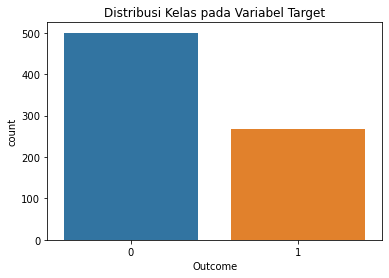

In [110]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data_truncated)
plt.title('Distribusi Kelas pada Variabel Target')
plt.show()

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state= 42)

In [112]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### MODELLING

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions on training data for SVM
y_train_pred_svm = svm_model.predict(X_train)

# Predictions on testing data for SVM
y_test_pred_svm = svm_model.predict(X_test)

# Accuracy calculation for SVM
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# Confusion matrix for training data for SVM
conf_matrix_train_svm = confusion_matrix(y_train, y_train_pred_svm)

# Classification report for training data for SVM
class_report_train_svm = classification_report(y_train, y_train_pred_svm)

# Confusion matrix for testing data for SVM
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)

# Classification report for testing data for SVM
class_report_test_svm = classification_report(y_test, y_test_pred_svm)

# Print results for SVM
print("\nResults for SVM:")
print(f"Accuracy on training data: {train_accuracy_svm:.2%}")
print(f"Accuracy on testing data: {test_accuracy_svm:.2%}")

print("\nConfusion Matrix (Training Data) - SVM:")
print(conf_matrix_train_svm)

print("\nConfusion Matrix (Testing Data) - SVM:")
print(conf_matrix_test_svm)


Results for SVM:
Accuracy on training data: 84.36%
Accuracy on testing data: 72.73%

Confusion Matrix (Training Data) - SVM:
[[372  28]
 [ 68 146]]

Confusion Matrix (Testing Data) - SVM:
[[84 16]
 [26 28]]


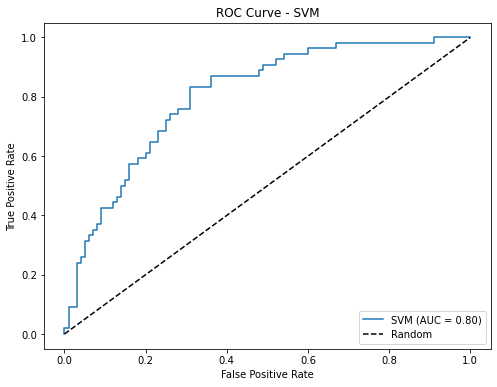


Results for SVM:
AUC-ROC on training data: 0.91
AUC-ROC on testing data: 0.80


In [114]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already defined

# Retrain SVM model with probability=True
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred_prob = svm_model.predict_proba(X_train)[:, 1]
y_test_pred_prob = svm_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC for training data
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Calculate AUC-ROC for testing data
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

# Plot ROC curve for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC results
print("\nResults for SVM:")
print(f"AUC-ROC on training data: {roc_auc_train:.2f}")
print(f"AUC-ROC on testing data: {roc_auc_test:.2f}")

In [115]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
rf_model.fit(X_train, y_train)

X_train_predict_rf = rf_model.predict(X_train)
X_test_predict_rf = rf_model.predict(X_test)

train_data_accuracy_rf = accuracy_score(X_train_predict_rf, y_train)
test_data_accuracy_rf = accuracy_score(X_test_predict_rf, y_test)
print('Akurasi data training (Random Forest) adalah = ', train_data_accuracy_rf)
print('Akurasi data testing (Random Forest) adalah = ', test_data_accuracy_rf)

Akurasi data training (Random Forest) adalah =  0.9625407166123778
Akurasi data testing (Random Forest) adalah =  0.7467532467532467


In [116]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Evaluasi model terbaik
X_train_predict_best = best_rf_model.predict(X_train)
X_test_predict_best = best_rf_model.predict(X_test)

train_data_accuracy_best = accuracy_score(X_train_predict_best, y_train)
test_data_accuracy_best = accuracy_score(X_test_predict_best, y_test)
print('Akurasi data training (Random Forest - Tuned) adalah = ', train_data_accuracy_best)
print('Akurasi data testing (Random Forest - Tuned) adalah = ', test_data_accuracy_best)

Akurasi data training (Random Forest - Tuned) adalah =  0.9104234527687296
Akurasi data testing (Random Forest - Tuned) adalah =  0.7337662337662337


In [117]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

X_train_predict_dt = dt_model.predict(X_train)
X_test_predict_dt = dt_model.predict(X_test)

train_data_accuracy_dt = accuracy_score(X_train_predict_dt, y_train)
test_data_accuracy_dt = accuracy_score(X_test_predict_dt, y_test)
print('Akurasi data training (Decision Tree) adalah = ', train_data_accuracy_dt)
print('Akurasi data testing (Decision Tree) adalah = ', test_data_accuracy_dt)

Akurasi data training (Decision Tree) adalah =  1.0
Akurasi data testing (Decision Tree) adalah =  0.6818181818181818


In [118]:
# Hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_

# Evaluasi model terbaik
X_train_predict_best_dt = best_dt_model.predict(X_train)
X_test_predict_best_dt = best_dt_model.predict(X_test)

train_data_accuracy_best_dt = accuracy_score(X_train_predict_best_dt, y_train)
test_data_accuracy_best_dt = accuracy_score(X_test_predict_best_dt, y_test)
print('Akurasi data training (Decision Tree - Tuned) adalah = ', train_data_accuracy_best_dt)
print('Akurasi data testing (Decision Tree - Tuned) adalah = ', test_data_accuracy_best_dt)

Akurasi data training (Decision Tree - Tuned) adalah =  0.9185667752442996
Akurasi data testing (Decision Tree - Tuned) adalah =  0.7337662337662337


In [119]:
from sklearn.neighbors import KNeighborsClassifier

# Model KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions on training data for KNN
y_train_pred_knn = knn_model.predict(X_train)

# Predictions on testing data for KNN
y_test_pred_knn = knn_model.predict(X_test)

# Accuracy calculation for KNN
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

# Confusion matrix for training data for KNN
conf_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)

# Classification report for training data for KNN
class_report_train_knn = classification_report(y_train, y_train_pred_knn)

# Confusion matrix for testing data for KNN
conf_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)

# Classification report for testing data for KNN
class_report_test_knn = classification_report(y_test, y_test_pred_knn)

# Print results for KNN
print("\nResults for KNN:")
print(f"Accuracy on training data: {train_accuracy_knn:.2%}")
print(f"Accuracy on testing data: {test_accuracy_knn:.2%}")

print("\nConfusion Matrix (Training Data) - KNN:")
print(conf_matrix_train_knn)

print("\nConfusion Matrix (Testing Data) - KNN:")
print(conf_matrix_test_knn)


Results for KNN:
Accuracy on training data: 83.06%
Accuracy on testing data: 72.08%

Confusion Matrix (Training Data) - KNN:
[[365  35]
 [ 69 145]]

Confusion Matrix (Testing Data) - KNN:
[[83 17]
 [26 28]]


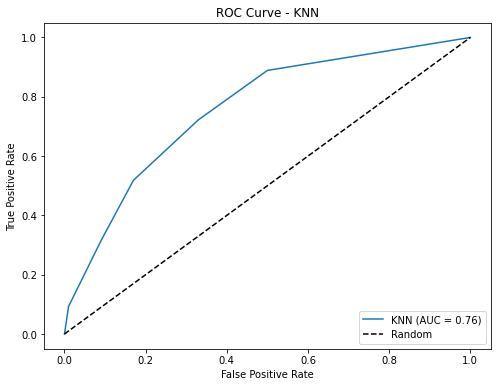


Results for KNN:
AUC-ROC on training data: 0.90
AUC-ROC on testing data: 0.76


In [120]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Predictions on training data
y_train_pred_prob = knn_model.predict_proba(X_train)[:, 1]
y_test_pred_prob = knn_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC for training data
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Calculate AUC-ROC for testing data
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

# Plot ROC curve for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC results
print("\nResults for KNN:")
print(f"AUC-ROC on training data: {roc_auc_train:.2f}")
print(f"AUC-ROC on testing data: {roc_auc_test:.2f}")

In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = gnb_model.predict(X_train)

# Predictions on testing data
y_test_pred = gnb_model.predict(X_test)

# Accuracy calculation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Classification report for training data
class_report_train = classification_report(y_train, y_train_pred)

# Confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Classification report for testing data
class_report_test = classification_report(y_test, y_test_pred)

# Print results
print("\nResults for GNB:")
print(f"Accuracy on training data: {train_accuracy:.2%}")
print(f"Accuracy on testing data: {test_accuracy:.2%}")

print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train)

print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test)


Results for GNB:
Accuracy on training data: 76.06%
Accuracy on testing data: 72.08%

Confusion Matrix (Training Data):
[[333  67]
 [ 80 134]]

Confusion Matrix (Testing Data):
[[77 23]
 [20 34]]


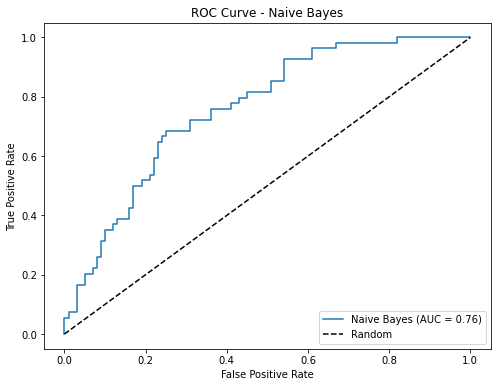


Results for Naive Bayes:
AUC-ROC on training data: 0.83
AUC-ROC on testing data: 0.76


In [122]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Predictions on training data
y_train_pred_prob = gnb_model.predict_proba(X_train)[:, 1]
y_test_pred_prob = gnb_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC for training data
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Calculate AUC-ROC for testing data
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

# Plot ROC curve for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC results
print("\nResults for Naive Bayes:")
print(f"AUC-ROC on training data: {roc_auc_train:.2f}")
print(f"AUC-ROC on testing data: {roc_auc_test:.2f}")

In [123]:
# Tes dengan input data

input_data = (1, 85, 66, 29, 79.7, 26.6, 0.351, 31)

input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1) # reshape data

std_data = scaler.transform(input_data_reshape)
std_data

prediction = svm_model.predict(std_data)
print(prediction)

# buat kondisi untuk outputnya
if (prediction[0] == 0):
    print('Pasien tidak terkena diabetes')
else :
    print('Pasien terkena diabetes')

[0]
Pasien tidak terkena diabetes


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [124]:
# simpan model
import pickle

filename = 'diabetes_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))